In [1]:
# Felipe Lacombe
# Rafael Bronzatti

In [2]:
import pyNN.spiNNaker as sim
import pyNN.utility.plotting as plot
import matplotlib.pyplot as plt
import pyNN.utility.plotting as plot
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
sim.setup(timestep=1.0)
sim.set_number_of_neurons_per_core(sim.IF_curr_exp, 100)

2022-06-11 03:43:20 INFO: Read cfg files: /home/bbpnrsoa/sPyNNaker/lib/python3.8/site-packages/spinn_front_end_common/interface/spinnaker.cfg, /home/bbpnrsoa/sPyNNaker/lib/python3.8/site-packages/spynnaker/pyNN/spynnaker.cfg, /home/bbpnrsoa/.spynnaker.cfg
2022-06-11 03:43:20 INFO: Will search these locations for binaries: /home/bbpnrsoa/sPyNNaker/lib/python3.8/site-packages/spinn_front_end_common/common_model_binaries : /home/bbpnrsoa/sPyNNaker/lib/python3.8/site-packages/spynnaker/pyNN/model_binaries
2022-06-11 03:43:20 INFO: Setting time scale factor to 1.
2022-06-11 03:43:20 INFO: Setting machine time step to 1000 micro-seconds.


['/home/bbpnrsoa/sPyNNaker/lib/python3.8/site-packages/spinn_front_end_common/interface/spinnaker.cfg', '/home/bbpnrsoa/sPyNNaker/lib/python3.8/site-packages/spynnaker/pyNN/spynnaker.cfg', '/home/bbpnrsoa/.spynnaker.cfg']


In [4]:
pop_1 = sim.Population(5, sim.IF_curr_exp(), label="pop_1")
input = sim.Population(5, sim.SpikeSourceArray(spike_times=[0]), label="input")

In [5]:
input_proj = sim.Projection(input, pop_1, sim.OneToOneConnector(),
synapse_type=sim.StaticSynapse(weight=5, delay=1))


In [6]:
pop_1.record(["spikes", "v"])


In [7]:
simtime = 10 
sim.run(simtime)

2022-06-11 03:43:20 INFO: Starting execution process
2022-06-11 03:43:20 INFO: Simulating for 10 1.0ms timesteps using a hardware timestep of 1000us
Adding Splitter selectors where appropriate
|0%                          50%                         100%|
2022-06-11 03:43:20 INFO: Time 0:00:00.008297 taken by SpynnakerSplitterSelector
Adding delay extensions as required
|0%                          50%                         100%|
2022-06-11 03:43:20 INFO: Time 0:00:00.007906 taken by DelaySupportAdder
2022-06-11 03:43:24 INFO: Time 0:00:03.063593 taken by SpallocMaxMachineGenerator
Preallocating resources for Extra Monitor support vertices
|0%                          50%                         100%|
2022-06-11 03:43:32 INFO: Time 0:00:08.941756 taken by PreAllocateResourcesForExtraMonitorSupport
Partitioning graph vertices
|0%                          50%                         100%|
Partitioning graph edges
|0%                          50%                         100%|
2022-06-11

10.0

In [8]:
neo = pop_1.get_data(variables=["spikes", "v"])
spikes = neo.segments[0].spiketrains
print(spikes)
v = neo.segments[0].filter(name='v')[0]
print(v)
sim.end()

Getting spikes for pop_1
|0%                          50%                         100%|
Getting v for pop_1
|0%                          50%                         100%|

[<SpikeTrain(array([7.]) * ms, [0.0 ms, 10.0 ms])>, <SpikeTrain(array([7.]) * ms, [0.0 ms, 10.0 ms])>, <SpikeTrain(array([7.]) * ms, [0.0 ms, 10.0 ms])>, <SpikeTrain(array([7.]) * ms, [0.0 ms, 10.0 ms])>, <SpikeTrain(array([7.]) * ms, [0.0 ms, 10.0 ms])>]
[[-65.         -65.         -65.         -65.         -65.        ]
 [-65.         -65.         -65.         -65.         -65.        ]
 [-60.58001709 -60.58001709 -60.58001709 -60.58001709 -60.58001709]
 [-57.17681885 -57.17681885 -57.17681885 -57.17681885 -57.17681885]
 [-54.59555054 -54.59555054 -54.59555054 -54.59555054 -54.59555054]
 [-52.67724609 -52.67724609 -52.67724609 -52.67724609 -52.67724609]
 [-51.29220581 -51.29220581 -51.29220581 -51.29220581 -51.29220581]
 [-50.33474731 -50.33474731 -50.33474731 -50.33474731 -50.33474731]
 [-65.         -65.         -65.         -65.         -65.        ]
 [-65.         -65.         -65.         -65.         -65.        ]] mV


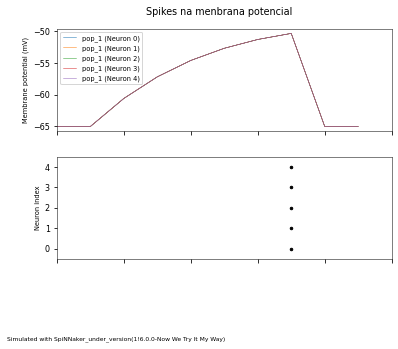

In [9]:
%matplotlib inline
plot.Figure(
    plot.Panel(v, ylabel="Membrane potential (mV)",
               data_labels=[pop_1.label], yticks=True, xlim=(0, simtime)),
    plot.Panel(spikes, yticks=True, markersize=5, xlim=(0, simtime)),
    title="Spikes na menbrana potencial",
    annotations="Simulated with {}".format(sim.name())
)

In [10]:


from time import sleep

def send_spikes(label, connection):
    sleep(0.01)
    
    connection.send_spike(label, 0)
    
    sleep(0.1)
    connection.send_spikes(label, range(1, 5))

In [11]:
injector_label = "injector"

In [12]:
connection = sim.external_devices.SpynnakerLiveSpikesConnection(
    local_port=None, send_labels=[injector_label])

2022-06-11 03:44:18 INFO: 0.0.0.0:36028 Waiting for message to indicate that the database is ready


In [13]:
connection.add_start_resume_callback(injector_label, send_spikes)

In [14]:
sim.setup(1.0)

2022-06-11 03:44:18 INFO: Read cfg files: /home/bbpnrsoa/sPyNNaker/lib/python3.8/site-packages/spinn_front_end_common/interface/spinnaker.cfg, /home/bbpnrsoa/sPyNNaker/lib/python3.8/site-packages/spynnaker/pyNN/spynnaker.cfg, /home/bbpnrsoa/.spynnaker.cfg
2022-06-11 03:44:18 INFO: Will search these locations for binaries: /home/bbpnrsoa/sPyNNaker/lib/python3.8/site-packages/spinn_front_end_common/common_model_binaries : /home/bbpnrsoa/sPyNNaker/lib/python3.8/site-packages/spynnaker/pyNN/model_binaries
2022-06-11 03:44:18 INFO: Setting time scale factor to 1.
2022-06-11 03:44:18 INFO: Setting machine time step to 1000 micro-seconds.


['/home/bbpnrsoa/sPyNNaker/lib/python3.8/site-packages/spinn_front_end_common/interface/spinnaker.cfg', '/home/bbpnrsoa/sPyNNaker/lib/python3.8/site-packages/spynnaker/pyNN/spynnaker.cfg', '/home/bbpnrsoa/.spynnaker.cfg']


0

In [15]:
injector = sim.Population(
    5, sim.external_devices.SpikeInjector(
        database_notify_port_num=connection.local_port),#registrando a conexão como listener
    label=injector_label)

In [16]:
pop = sim.Population(5, sim.IF_curr_exp(), label="pop")

In [17]:
pop.record(["spikes", "v"])

In [18]:
sim.Projection(injector, pop, sim.OneToOneConnector(), sim.StaticSynapse(weight=5))

projection from pre injector to post pop with connector OneToOneConnector()

In [19]:
sim.run(1000)

2022-06-11 03:44:18 INFO: Starting execution process
2022-06-11 03:44:18 INFO: Simulating for 1000 1.0ms timesteps using a hardware timestep of 1000us
Adding Splitter selectors where appropriate
|0%                          50%                         100%|
2022-06-11 03:44:18 INFO: Time 0:00:00.008604 taken by SpynnakerSplitterSelector
Adding delay extensions as required
|0%                          50%                         100%|
2022-06-11 03:44:18 INFO: Time 0:00:00.005571 taken by DelaySupportAdder
2022-06-11 03:44:21 INFO: Time 0:00:03.034568 taken by SpallocMaxMachineGenerator
Preallocating resources for Extra Monitor support vertices
|0%                          50%                         100%|
2022-06-11 03:44:30 INFO: Time 0:00:08.920172 taken by PreAllocateResourcesForExtraMonitorSupport
Partitioning graph vertices
|0%                          50%                         100%|
Partitioning graph edges
|0%                          50%                         100%|
2022-06-

1000.0

In [20]:
data_sim = pop.get_data(["spikes", "v"])
spikes = data_sim.segments[0].spiketrains
print(spikes)
v = data_sim.segments[0].filter(name='v')[0]
print(v)

Getting spikes for pop
|0%                          50%                         100%|
Getting v for pop
|0%                          50%                         100%|

[<SpikeTrain(array([18.]) * ms, [0.0 ms, 1000.0 ms])>, <SpikeTrain(array([118.]) * ms, [0.0 ms, 1000.0 ms])>, <SpikeTrain(array([118.]) * ms, [0.0 ms, 1000.0 ms])>, <SpikeTrain(array([118.]) * ms, [0.0 ms, 1000.0 ms])>, <SpikeTrain(array([118.]) * ms, [0.0 ms, 1000.0 ms])>]
[[-65.         -65.         -65.         -65.         -65.        ]
 [-65.         -65.         -65.         -65.         -65.        ]
 [-65.         -65.         -65.         -65.         -65.        ]
 ...
 [-64.99938965 -64.99938965 -64.99938965 -64.99938965 -64.99938965]
 [-64.99938965 -64.99938965 -64.99938965 -64.99938965 -64.99938965]
 [-64.99938965 -64.99938965 -64.99938965 -64.99938965 -64.99938965]] mV


In [21]:
sim.end() 

In [22]:
print(spikes)

[<SpikeTrain(array([18.]) * ms, [0.0 ms, 1000.0 ms])>, <SpikeTrain(array([118.]) * ms, [0.0 ms, 1000.0 ms])>, <SpikeTrain(array([118.]) * ms, [0.0 ms, 1000.0 ms])>, <SpikeTrain(array([118.]) * ms, [0.0 ms, 1000.0 ms])>, <SpikeTrain(array([118.]) * ms, [0.0 ms, 1000.0 ms])>]


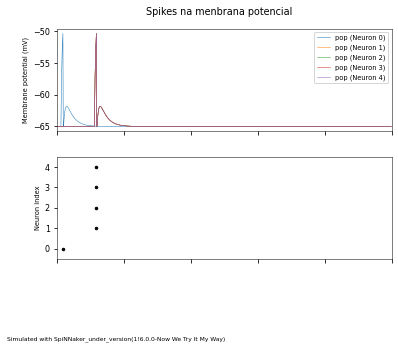

In [23]:
plot.Figure(
    plot.Panel(v, ylabel="Membrane potential (mV)",
               data_labels=[pop.label], yticks=True, xlim=(0, 1000)),
    plot.Panel(spikes, yticks=True, markersize=5, xlim=(0, 1000)),
    title="Spikes na menbrana potencial",
    annotations="Simulated with {}".format(sim.name())
)